<div style="padding:20px;
            color:black;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">Customer Personality Analysis</div>

**DataSet Link : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis**

### `Import Libraries`

In [1]:
## main Libraries
import numpy as np
import pandas as pd

## Datetime , i will need it in feature engineering step
from datetime import date

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer

## preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler

## decomposition
from sklearn.decomposition import PCA

## CLustering
from sklearn.cluster import KMeans ##, AgglomerativeClustering
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## setting some Libraries
pd.set_option('display.max_columns', None)
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')
## Set the figure and axes face color
sns.set(rc={"axes.facecolor": "#FFE4D9", "figure.facecolor": "#FFE4D9"})
## custom palette
custom_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(custom_palette)
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

### `Load Data`

In [2]:
data = pd.read_csv("output/02_data_cleaned.csv")

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> EDA & Data Analysis
</div>

## <b>3.1 <span style='color:#682F2F'>Univariate Analysis</span></b>
###### `- explores each variable in a data set, separately.`

In [3]:
data.sample(3)

,Education,Marital_status,Income,Dt_customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Complain,Response,Age,Spending,Seniority,Children,Has_child,Campaigns_accepted
287,Postgraduate,In couple,50898.0,2013-01-08,88,285,28,242,55,114,135,13,6,2,12,5,0,0,67,859,10.676712,2 children,Has child,0
1063,Postgraduate,Alone,35860.0,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,0,0,50,49,9.317808,2 children,Has child,1
1155,Postgraduate,Alone,23091.0,2014-05-28,98,35,0,11,0,0,2,4,2,1,3,7,0,0,60,48,9.293151,2 children,Has child,0


###### 'Age Column'

In [4]:
np.floor(data["Age"].describe()).to_frame()

,Age
count,2240.0
mean,54.0
std,11.0
min,27.0
25%,46.0
50%,53.0
75%,64.0
max,130.0


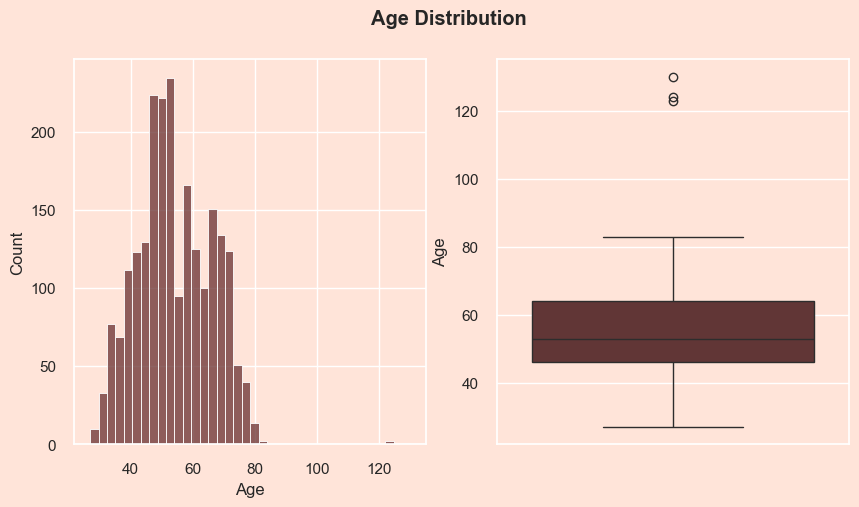

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Age")
sns.boxplot(ax=ax[1], data=data, y="Age")
fig.suptitle('Age Distribution', weight="bold")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b>NOTE : </b>Age column have outliers, let's handle it.</div>

In [6]:
## replace outliers with mean value
age_mean = data['Age'].mean()
data.loc[data['Age'] > 83,'Age'] = age_mean

In [7]:
np.floor(data["Age"].describe()).to_frame()

,Age
count,2240.0
mean,54.0
std,11.0
min,27.0
25%,46.0
50%,53.0
75%,64.0
max,83.0


In [8]:
fig = px.histogram(data["Age"], marginal="box", title="<b>Age Distribution After Handling Outliers",
                   color_discrete_map={"Age":"darkred"})
fig.show()

print(f"Skewness of Age Distribution is {data['Age'].skew()}")

Skewness of Age Distribution is 0.09329573397028006


###### `The ages of customers range from 11 to 83, and the average age is equal to 54`

###### 'Income Column'
- Customer's yearly household income

In [9]:
data['Income'].describe().to_frame()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


The average income is 52247.25 and the min income value is 1730

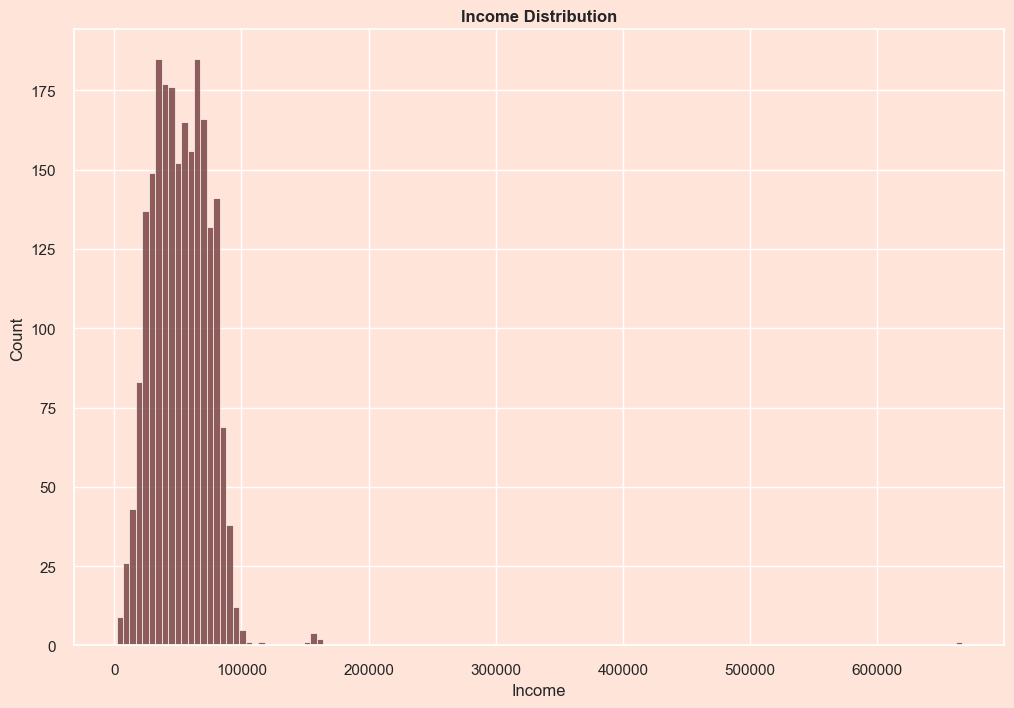

In [10]:
sns.histplot(data=data, x="Income")
plt.title("Income Distribution", weight="bold")
plt.show()

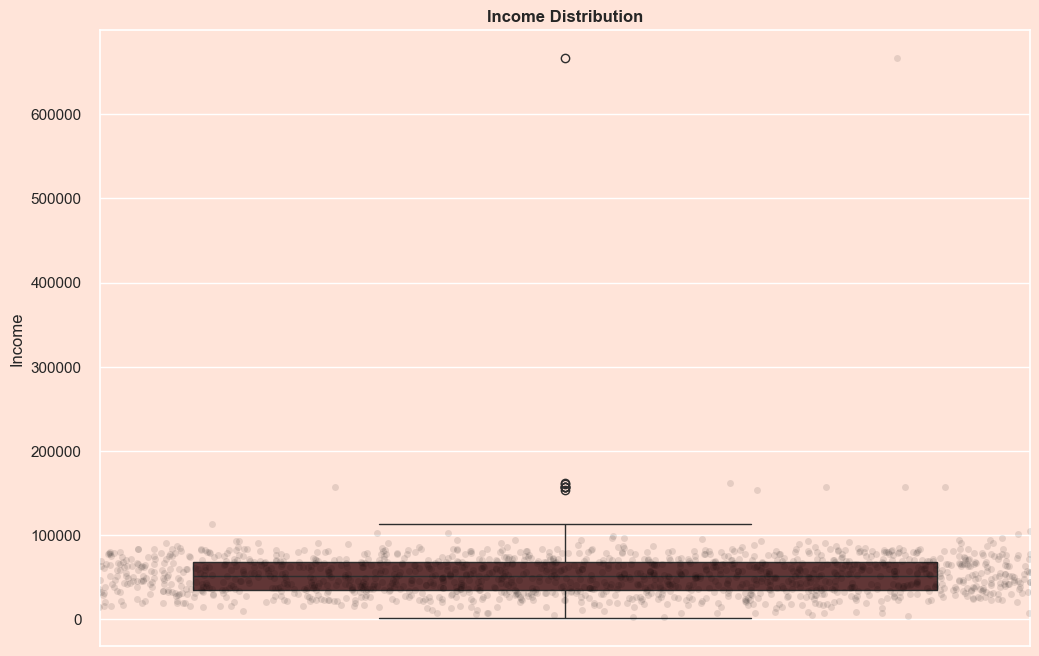

In [11]:
sns.boxplot(data=data, y="Income")
sns.stripplot(data=data, y="Income", jitter=0.8, alpha=0.1, color='black')
plt.title("Income Distribution", weight="bold")
plt.show()

In [12]:
data.shape

(2240, 24)

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b>NOTE : </b>Income column have outliers, let's handle it.</div>

In [13]:
## drop outliers
data = data.loc[(data["Income"] <= 200000)]
## reset index after drop outliers
data.reset_index(drop=True, inplace=True)
print(f'Shape After Drop Outliers : {data.shape}')
print(f'Statistics Info. about Income : \n{data["Income"].describe()}')

Shape After Drop Outliers : (2215, 24)
Statistics Info. about Income : 
count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64


In [14]:
fig = px.histogram(data["Income"], marginal="box", title="<b>Income Distribution After Handling Outliers",
                  color_discrete_map={"Income":"darkred"})
fig.show()

print(f"Skewness of Income Distribution is {data['Income'].skew()}")

Skewness of Income Distribution is 0.34734967591402816


##### 'Seniority Column'
- The customer has been dealing with the company for how many years

In [15]:
data['Seniority'].describe()

count    2215.000000
mean       10.173983
std         0.554736
min         9.205479
25%         9.698630
50%        10.178082
75%        10.654795
max        11.120548
Name: Seniority, dtype: float64

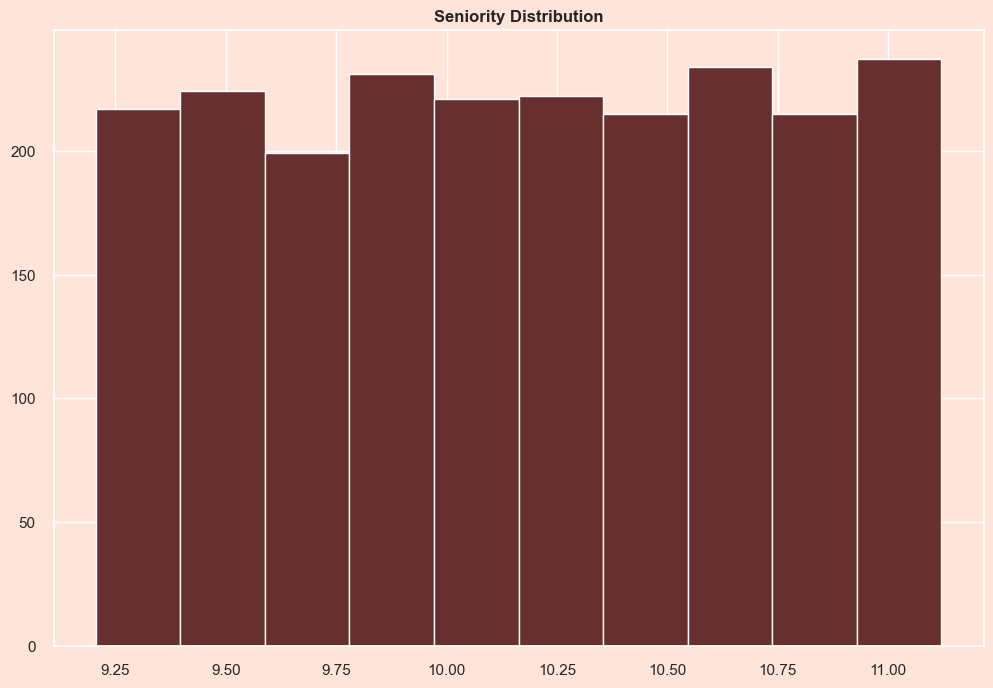

In [16]:
plt.hist(x=data["Seniority"])
plt.title("Seniority Distribution", weight="bold")
plt.show()

### 'Products'
- ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
- Amount spent in last 2 years

In [17]:
products = data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
products.describe()

,Wines,Fruits,Meat,Fish,Sweets,Gold
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684
std,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> - Right Skewed (Positive) in ALL PRODUCTS: The mean is greater than the median</div>

In [18]:
data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()

Wines     676074
Fruits     58391
Meat      370045
Fish       83397
Sweets     59895
Gold       97415
dtype: int64

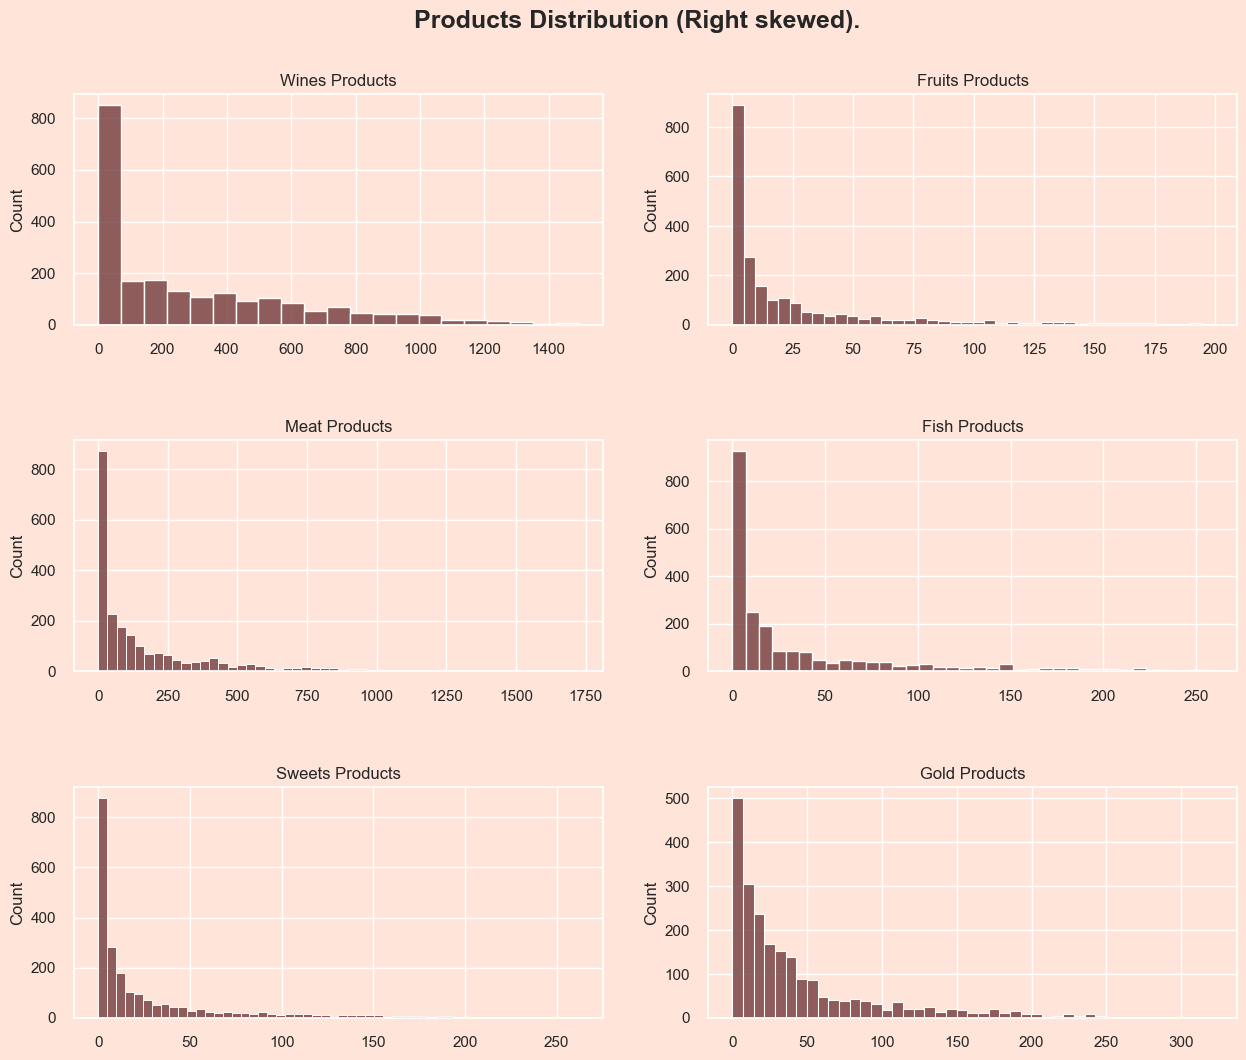

In [19]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Products Distribution (Right skewed).", fontsize=18, y=0.95, weight="bold")



for i, product in enumerate(products.columns.tolist()):
    
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ax=ax, data=products, x=products[product])
    
    # chart formatting
    ax.set_title(f"{product} Products")
    ax.set_xlabel("")

plt.show()

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> Distribution plots indicate skewed to the right distributions of features. Thus, it is crucial to avoid assuming that a product (e.g., Wines, meats) is the top-selling. </div>

###### 'Spending Columns'

In [20]:
data["Spending"].describe().to_frame()

,Spending
count,2215.000000
mean,607.321445
std,602.925291
min,5.000000
25%,69.000000
50%,397.000000
75%,1048.000000
max,2525.000000



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> - Right Skewed (Positive) in ALL PRODUCTS: The mean is greater than the median</div>

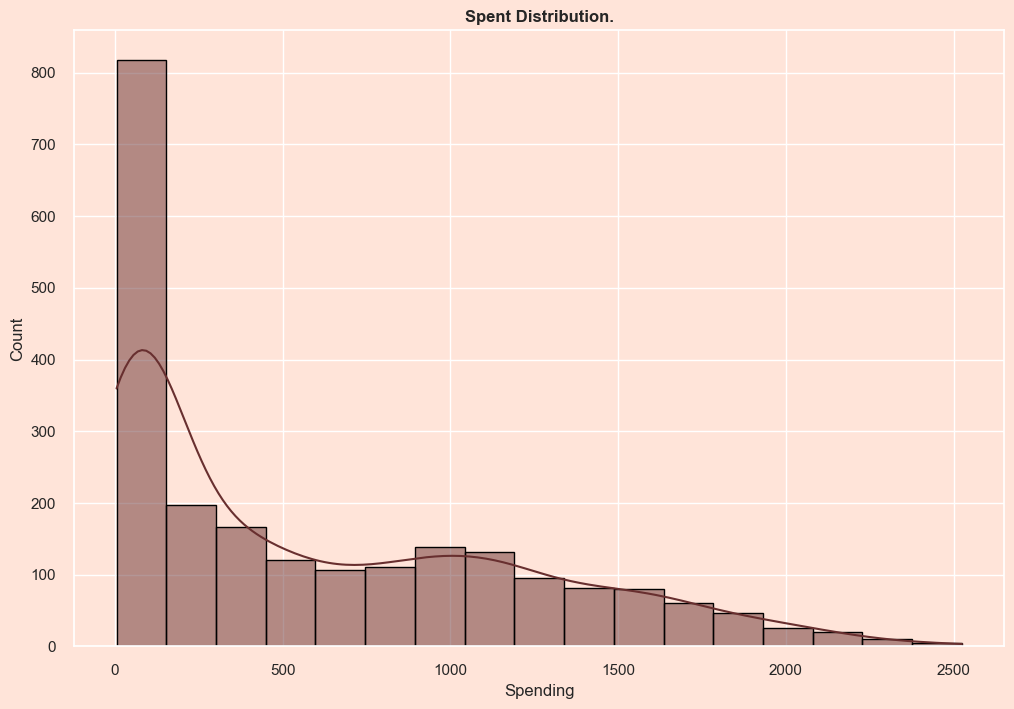

In [21]:
sns.histplot(data=data, x="Spending", kde=True, edgecolor="black")
plt.title("Spent Distribution.", weight="bold")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> More than 50% of customers spend less than 10000$ </div>

##### 'Education Column'

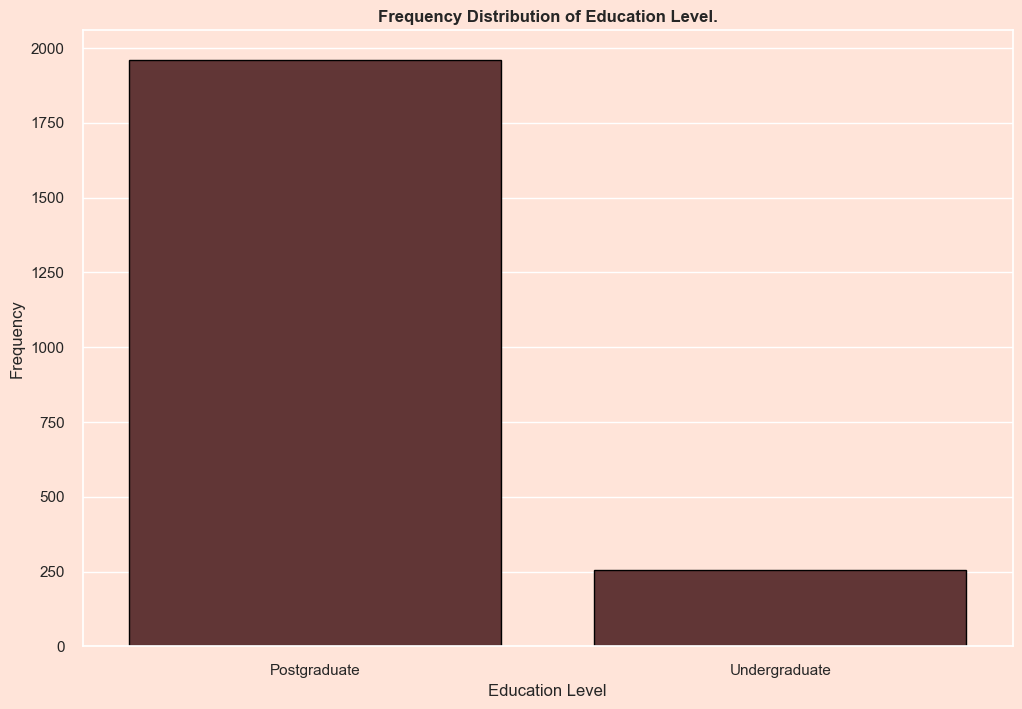

In [22]:
sns.countplot(data=data, x="Education",edgecolor="black")
plt.title("Frequency Distribution of Education Level.", weight="bold")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

In [23]:
pd.DataFrame({"Count" : data["Education"].value_counts(),
              "Ratio" : round(data["Education"].value_counts(normalize=True),2)*100})

,Count,Ratio
Education,,
Postgraduate,1961,89.0
Undergraduate,254,11.0



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:30%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority is Postgraduate, 89%. </div>

In [24]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

##### 'Marital_status Column'

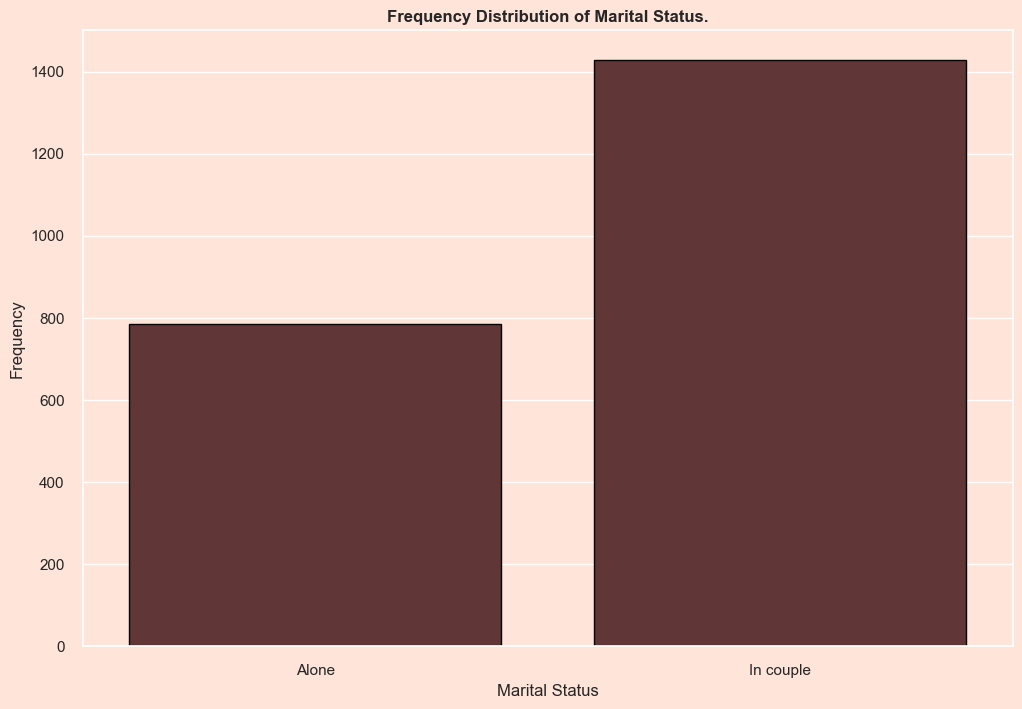

In [25]:
sns.countplot(data=data, x="Marital_status", edgecolor="black")
plt.title("Frequency Distribution of Marital Status.", weight="bold")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

In [26]:
pd.DataFrame({"Count" : data["Marital_status"].value_counts(),
              "Ratio" : round(data["Marital_status"].value_counts(normalize=True),2)*100})

,Count,Ratio
Marital_status,,
In couple,1429,65.0
Alone,786,35.0



<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority is In couple, 65%. </div>

In [27]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

##### 'Children Column'
- sum of kidhome and teenhome columns

In [28]:
pd.DataFrame({"Count" : data["Children"].value_counts(),
              "Ratio" : round(data["Children"].value_counts(normalize=True),2)*100})

,Count,Ratio
Children,,
1 child,1116,50.0
No child,633,29.0
2 children,416,19.0
3 children,50,2.0


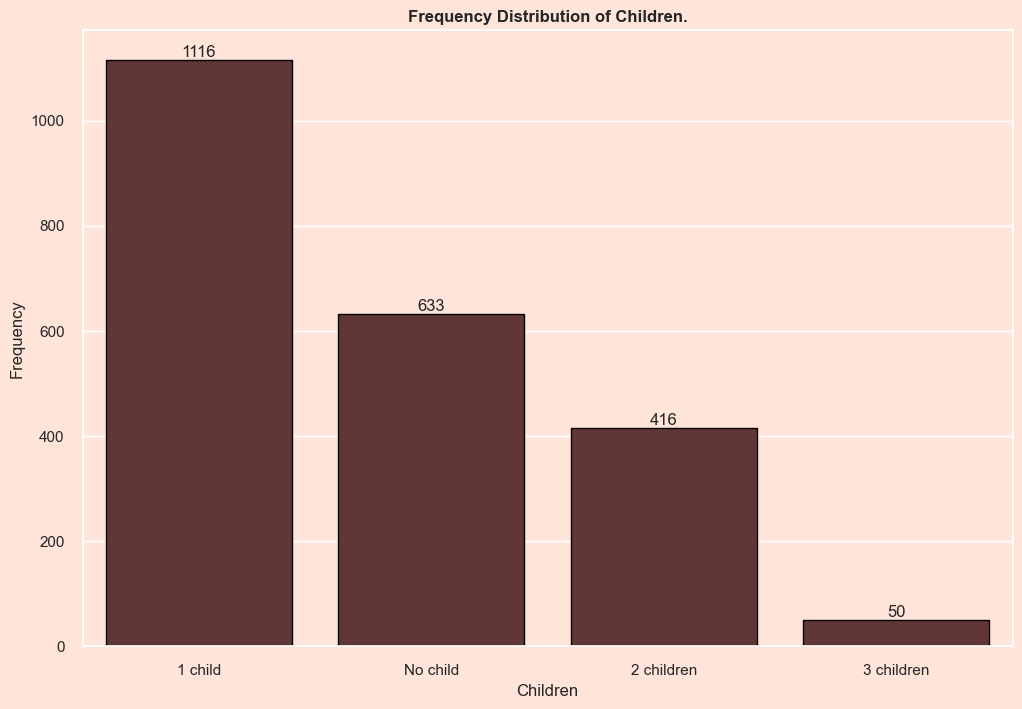

In [29]:
ax = sns.countplot(data=data, x="Children", edgecolor="black",
                   order = data['Children'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Children.", weight="bold")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 50% of clients have one child. </div>

In [30]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

In [31]:
pd.DataFrame({"Count" : data["Has_child"].value_counts(),
              "Ratio" : round(data["Has_child"].value_counts(normalize=True),2)*100})

,Count,Ratio
Has_child,,
Has child,1582,71.0
no child,633,29.0


In [32]:
px.histogram(data,
             x="Has_child",
             color_discrete_sequence=px.colors.qualitative.Antique,
             title= "<b>Visualizing Has Child Feature Frequencies")


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 71% of customers have children. </div>

###### 'Campaigns_accepted Column'
- sum of AcceptedCmp

In [33]:
## check data type
data["Campaigns_accepted"].dtype

dtype('int64')

In [34]:
data["Campaigns_accepted"].unique()

array([0, 1, 2, 3, 4])

In [35]:
pd.DataFrame({"Count" : data["Campaigns_accepted"].value_counts(),
              "Ratio" : round(data["Campaigns_accepted"].value_counts(normalize=True),3)*100})

,Count,Ratio
Campaigns_accepted,,
0,1756,79.3
1,323,14.6
2,81,3.7
3,44,2.0
4,11,0.5


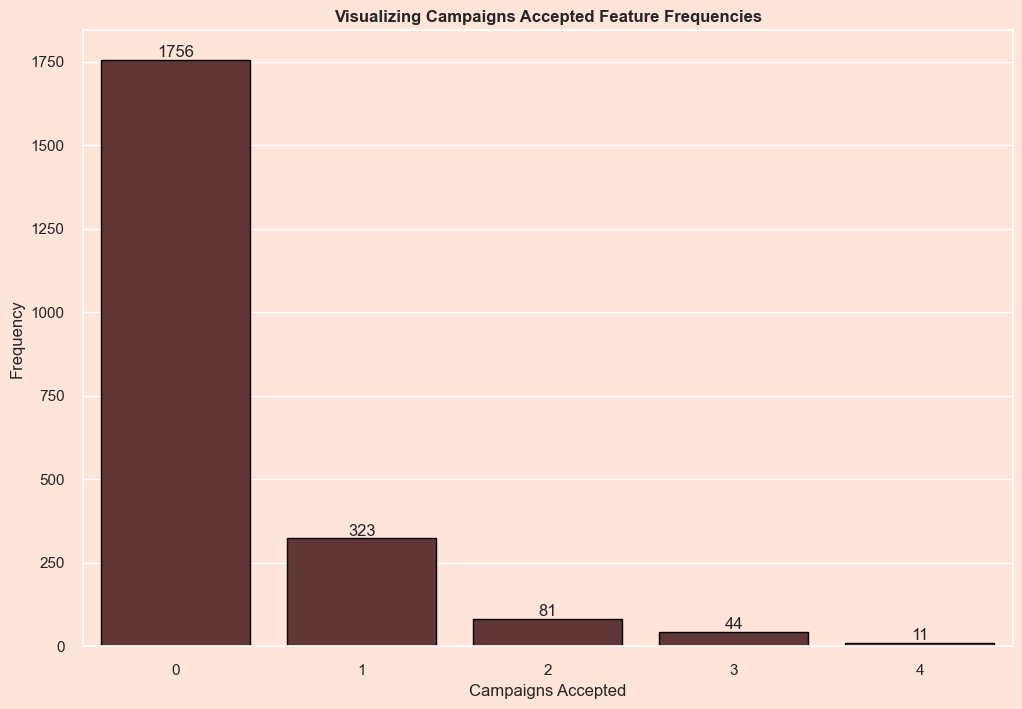

In [36]:
ax = sns.countplot(data=data, x="Campaigns_accepted", edgecolor="black")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Visualizing Campaigns Accepted Feature Frequencies", weight="bold")
plt.xlabel("Campaigns Accepted")
plt.ylabel("Frequency")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority of campaigns are unacceptable, at a rate of 79% . </div>

##### 'Response Column'
-  1 if customer accepted the offer in the last campaign, 0 otherwise

In [37]:
## et's see the unique value
data["Response"].unique() 

array([1, 0])

In [38]:
pd.DataFrame({"Count" : data["Response"].value_counts(),
              "Ratio" : round(data["Response"].value_counts(normalize=True),3)*100})

,Count,Ratio
Response,,
0,1882,85.0
1,333,15.0


##### 'Recency Column'
-  Number of days since customer's last purchase

In [39]:
data["Recency"].dtype

dtype('int64')

In [40]:
data["Recency"].describe()

count    2215.000000
mean       49.024379
std        28.949608
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

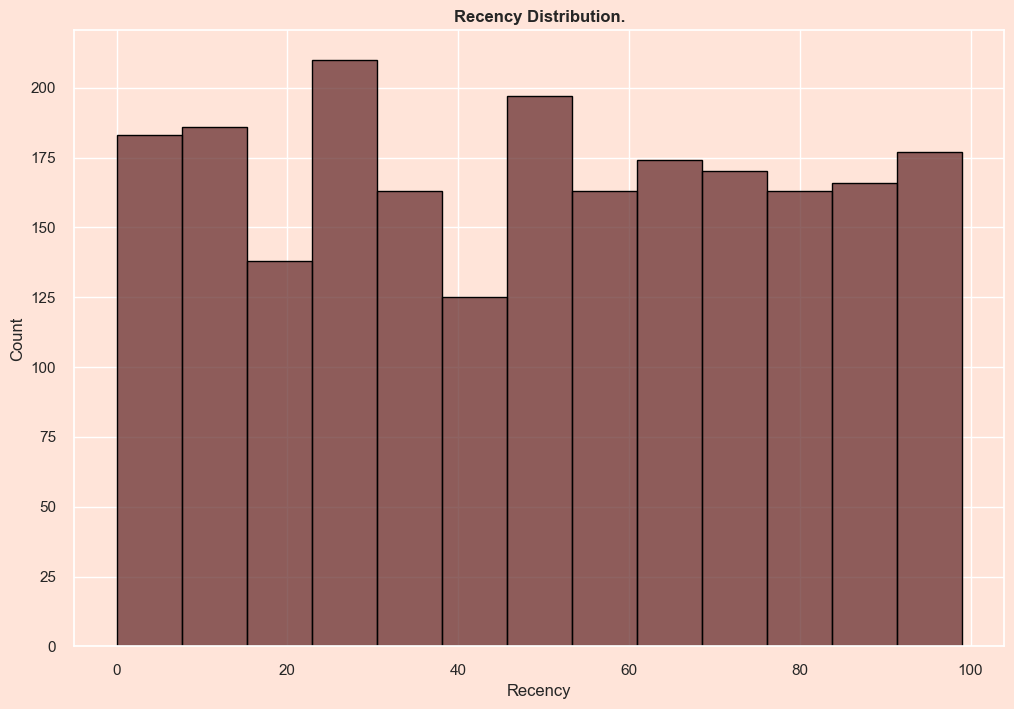

In [41]:
sns.histplot(data=data,
            x="Recency",
            edgecolor='black')
plt.title("Recency Distribution.", weight="bold")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:29%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Last Purchase in Range 1, 89 Days. </div>

In [42]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

--------------

##### 'Place'
- ['Web', 'Catalog', 'Store'] 
- Web: Number of purchases made through the company’s website
- Catalog: Number of purchases made using a catalogue
- Store: Number of purchases made directly in stores

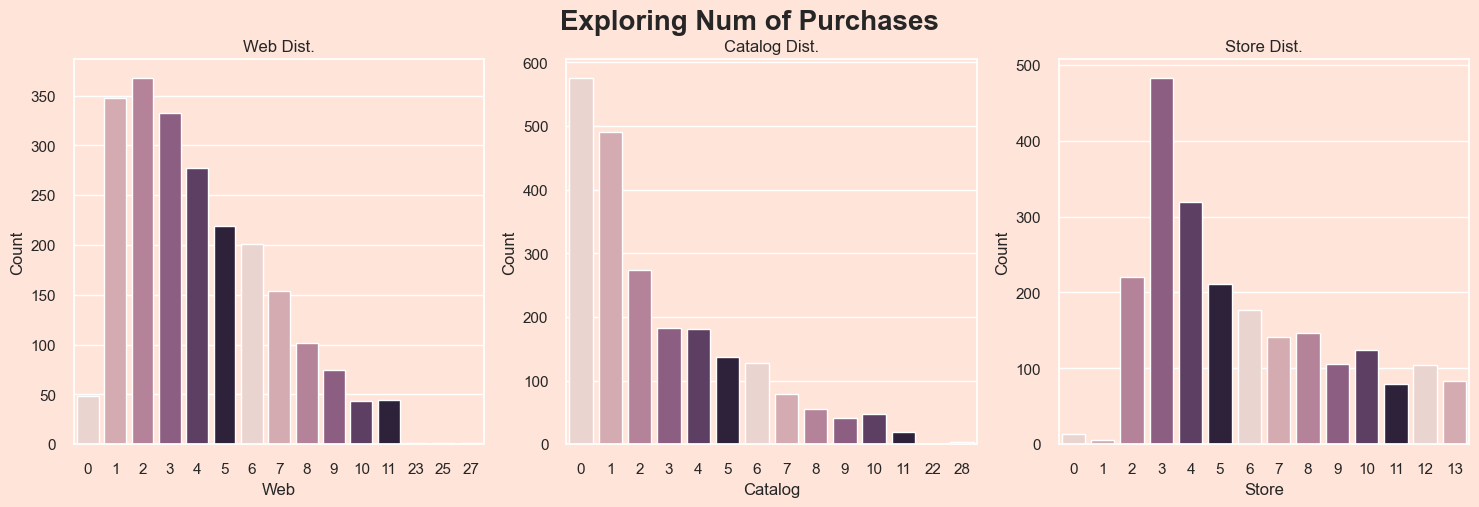

In [43]:
used_cols = ['Web', 'Catalog', 'Store']

fig, ax = plt.subplots(1, 3, figsize = (18,5)) 
plt.suptitle("Exploring Num of Purchases", fontsize=20, weight="bold") 

for i in range(3):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i], palette=sns.cubehelix_palette())
    ax[i].set_title(f"{used_cols[i]} Dist.")
    ax[i].set_ylabel("Count")

plt.show()

---------------

In [44]:
data[['Web', 'Catalog', 'Store']].describe()

,Web,Catalog,Store
count,2215.000000,2215.000000,2215.000000
mean,4.085779,2.671783,5.802257
std,2.741473,2.927179,3.250974
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


In [45]:
Purchases = pd.DataFrame(data[['Web', 'Catalog', 'Store']].sum()).rename(columns={0:"Count"})
Purchases

,Count
Web,9050
Catalog,5918
Store,12852


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Most purchases are made through the store and web.</div>


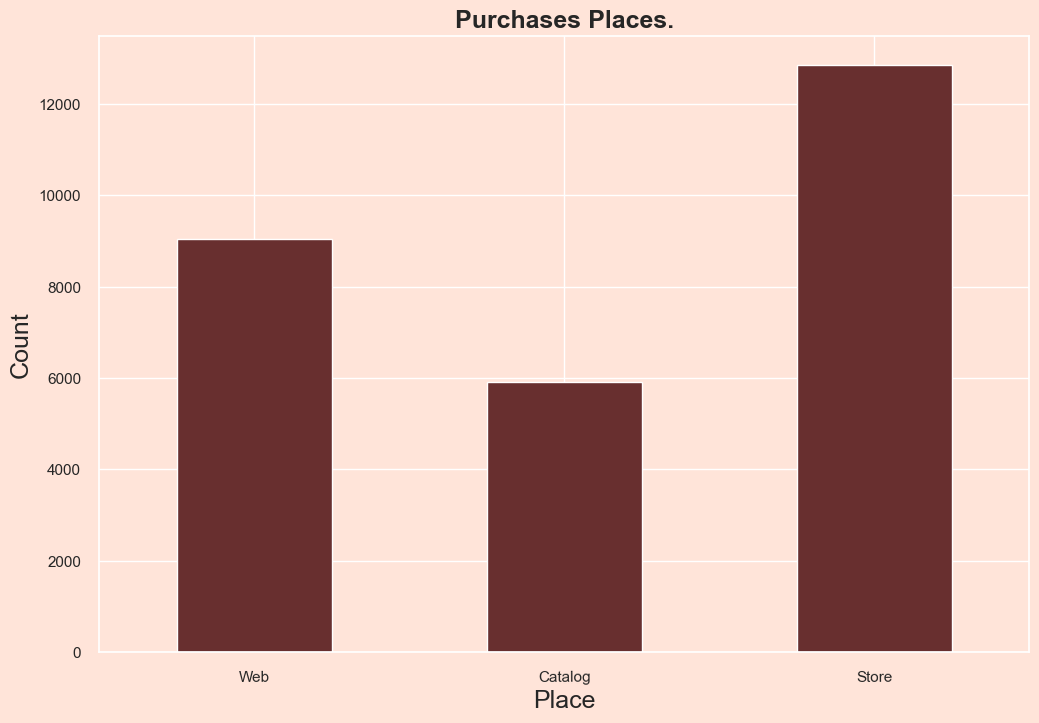

In [46]:
Purchases.plot(kind='bar', legend=False)
plt.title("Purchases places.".title(), fontsize=18, weight="bold")
plt.xticks(rotation=0.45)
plt.xlabel("Place", fontsize=18)
plt.ylabel("Count", fontsize=18)
# Display the plot
plt.show()

-----------

##### 'Complain Column'
- 1 if the customer complained in the last 2 years, 0 otherwise

In [47]:
pd.DataFrame({"Count" : data["Complain"].value_counts(),
              "Ratio" : round(data["Complain"].value_counts(normalize=True),3)*100})

,Count,Ratio
Complain,,
0,2194,99.1
1,21,0.9


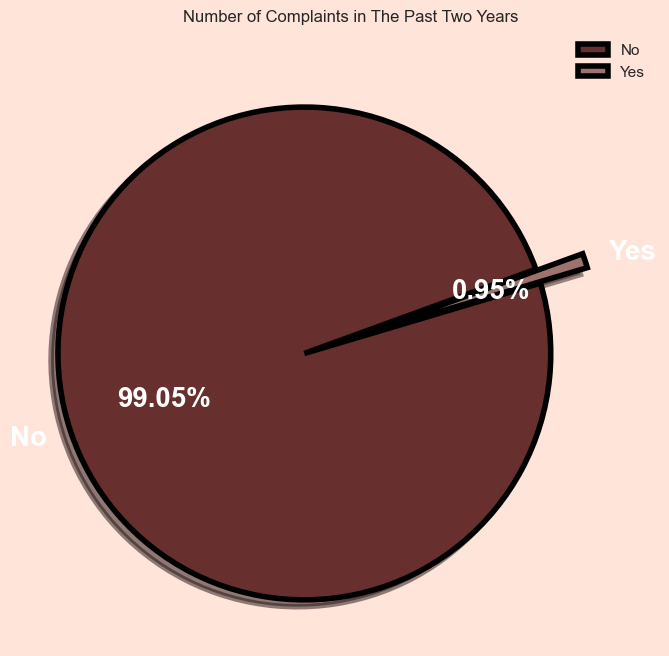

In [48]:
Complain_counts = data["Complain"].value_counts()
plt.pie(Complain_counts.values,
        labels=Complain_counts.index.map({0: "No", 1: "Yes"}),
        explode=[0.2,0],
        shadow=True,
        textprops=dict(size= 20, color= "white", weight="bold"),
        autopct="%.2f%%",
        wedgeprops=dict(edgecolor = "black", linewidth = 4),
        startangle = 20)
plt.title("Number of Complaints in The Past Two Years")
plt.legend(["No", "Yes"])
plt.show() 


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 %;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 99% of customers have not complained in the past two years . </div>


In [49]:
print(data["Dt_customer"].dtype)


object


##### 'Dt_Customer' 
- Date of customer's enrollment with the company

In [50]:
data["Dt_customer"] = pd.to_datetime(data["Dt_customer"], errors="coerce")

## month feature creation
data["customer_month"] = data["Dt_customer"].dt.month_name()
## year feature creation
data["customer_year"] = data["Dt_customer"].dt.year
## day feature creation
data["day_name"] = data["Dt_customer"].dt.day_name()

In [51]:
data["customer_month"].value_counts().sort_values(ascending=False)

customer_month
August       219
May          213
October      210
March        209
January      195
September    191
November     183
April        181
February     177
December     175
June         162
July         100
Name: count, dtype: int64

In [52]:
data["customer_year"].value_counts().sort_values(ascending=False)

customer_year
2013    1172
2014     553
2012     490
Name: count, dtype: int64


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:30%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> In 2013, we gained many customers.</div>


###### 'Numwebvisitsmonth Column'
- Number of visits to company’s website in the last month

In [53]:
data["Numwebvisitsmonth"].describe()

count    2215.000000
mean        5.318736
std         2.425863
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: Numwebvisitsmonth, dtype: float64

In [54]:
data["Numwebvisitsmonth"].sum()

np.int64(11781)


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:35%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The Total of Num Web Visits Month = 11781.</div>


-----------------

## <b>3.2 <span style='color:#682F2F'>Bi-variate/Multivariate analysis</span></b>

#### `1. Is there a relationship between age and annual income? Does income tend to increase or decrease with age?`

In [55]:
corre = data[["Income", "Age"]].corr()
print(f"The Correlation Between Income and Age = {round(corre.loc['Age','Income'],3)}")

The Correlation Between Income and Age = 0.2


In [56]:
def scatter_plot(Data, X, Y, h=None):
    sns.scatterplot(data=Data, x=X, y=Y,  hue=h)
    plt.title(f"Correlation Between {X} and {Y}.")
    plt.xlabel(f"{X}")
    plt.ylabel(f"{Y}")
    plt.show()

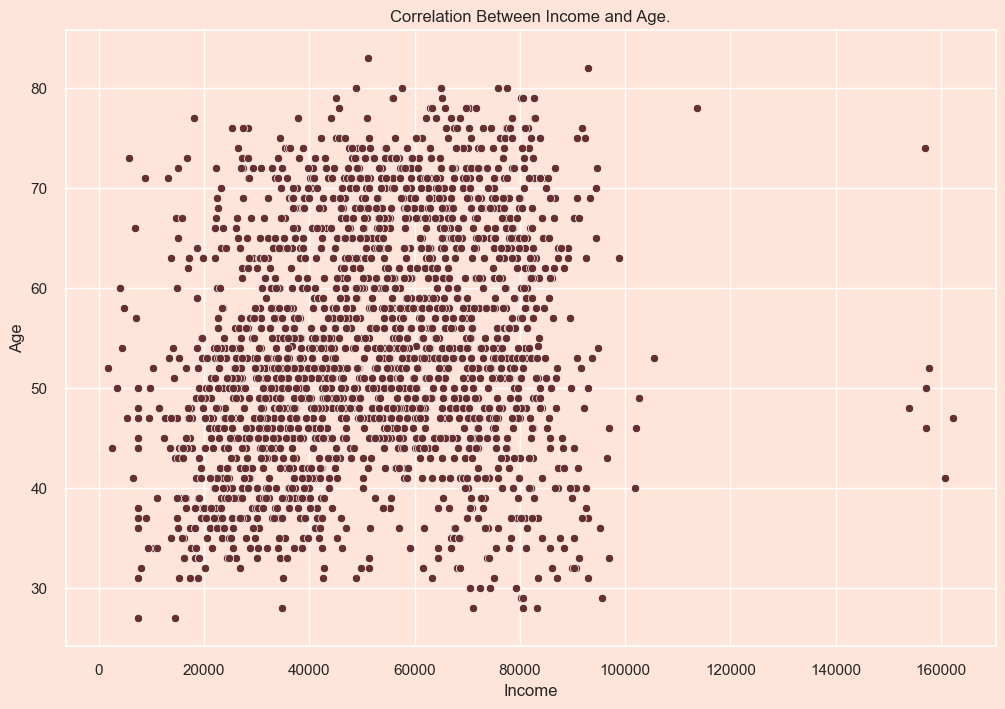

In [57]:
scatter_plot(Data=data, X="Income", Y="Age")


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The Correlation Between (Income, Age) is Weak Positive Corr.</div>


#### `2. Are there differences in purchase preferences between married and single individuals?`

In [58]:
data.groupby('Marital_status')['Spending'].sum().to_frame()

,Spending
Marital_status,
Alone,489525
In couple,855692


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:53%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Obviously, Married Customers Spend More Money Than Single Customers.</div>


In [59]:
products_list = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

In [60]:
l = data.groupby('Marital_status')[products_list].sum()

In [61]:
fig = px.bar(data_frame=l.reset_index(), x='Marital_status',
            y=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
            barmode="group", title="<b> Marital Status by Products Purchase",
            color_discrete_sequence=px.colors.sequential.Greys_r)
fig.show()

#### `3. Is there a relationship between education level and annual income?`

In [62]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted',
       'customer_month', 'customer_year', 'day_name'],
      dtype='object')

In [63]:
data.groupby("Education")["Income"].sum().to_frame()

,Income
Education,
Postgraduate,104490067.0
Undergraduate,10623176.0


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:55%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Makes Sense , Postgraduate Customer have more income than Undergraduate .</div>


In [64]:
fig = px.histogram(data_frame=data, x="Income", color="Education", 
                   title= "Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

In [65]:
fig1 = px.box(data_frame=data, x="Education", y="Income",
             title= "<b> Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig2 = px.strip(data, x="Education", y="Income", color_discrete_sequence=px.colors.qualitative.Antique)
all_fig = go.Figure(data=fig1.data + fig2.data, layout=fig1.layout) ## combine
all_fig.show()

#### `4. explore the correlation between different products.`

In [66]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted',
       'customer_month', 'customer_year', 'day_name'],
      dtype='object')

In [67]:
product_corr = data[products_list].corr()
product_corr

,Wines,Fruits,Meat,Fish,Sweets,Gold
Wines,1.000000,0.386977,0.568752,0.397602,0.390178,0.392588
Fruits,0.386977,1.000000,0.547796,0.593407,0.571581,0.396443
Meat,0.568752,0.547796,1.000000,0.573507,0.535048,0.359328
Fish,0.397602,0.593407,0.573507,1.000000,0.583804,0.427056
Sweets,0.390178,0.571581,0.535048,0.583804,1.000000,0.357336
Gold,0.392588,0.396443,0.359328,0.427056,0.357336,1.000000


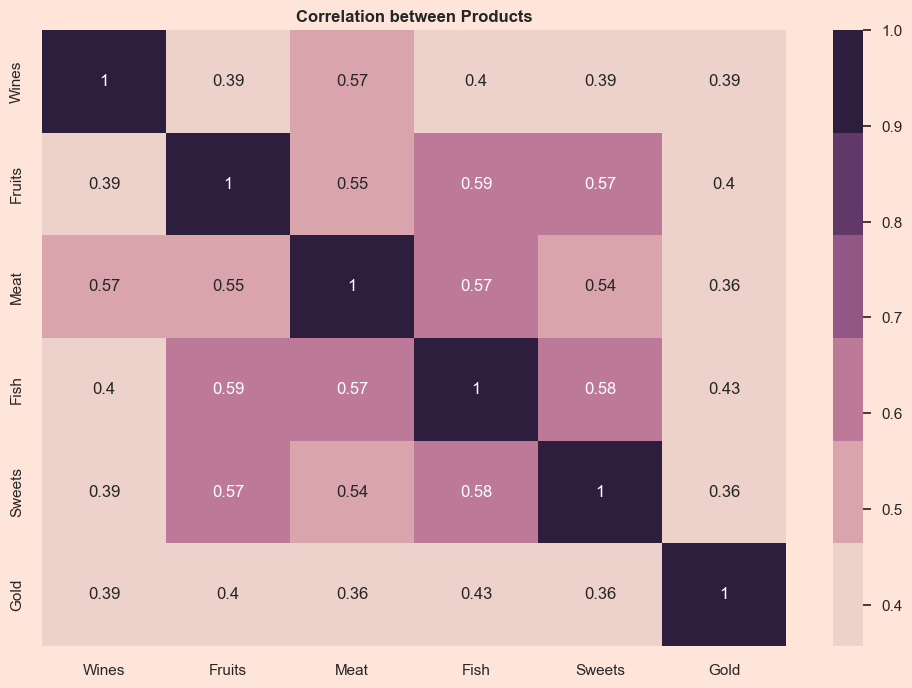

In [68]:
sns.heatmap(product_corr, annot=True, cmap=sns.cubehelix_palette())
plt.title("Correlation between Products", weight="bold")
plt.show()

**There is a relationship between purchasing products and some of them, such as : (Meat, Fish) and (Fish, Fruits)**

#### `5. explore the correlation between Age and Income.`

In [69]:
data[["Age", "Income"]].corr()

,Age,Income
Age,1.000000,0.199855
Income,0.199855,1.000000


In [70]:
px.imshow(data[["Age", "Income"]].corr(), text_auto=True,
         title="<b>Correlation Between Age and Income",  color_continuous_scale=px.colors.qualitative.Antique)

In [71]:
px.scatter(data_frame=data, x="Income", y="Age",
           title="<b>Correlation Between Age and Income",  color_discrete_sequence=px.colors.qualitative.Antique)

**The Correlation between income and age is Weak Positive.**

#### `Divide the data into age groups and compare the income levels within each group.`

In [72]:
## List of bins 
bins = [20, 40, 60 , 80, np.inf]
print(bins)

## Define labels
labels = ['20-40', '40-60', '60-80', 'Over 80']
print(labels)

# Customers Age Group
data["Age_Group"] = pd.cut(data["Age"], bins, labels=labels)

[20, 40, 60, 80, inf]
['20-40', '40-60', '60-80', 'Over 80']


In [73]:
data.groupby("Age_Group")["Income"].sum().sort_values(ascending=False).reset_index()

,Age_Group,Income
0,40-60,61737314.0
1,60-80,39638255.0
2,20-40,13593506.0
3,Over 80,144168.0


**The highest income is for people between the ages of 40-60**

In [74]:
fig = px.histogram(data_frame=data,
       x="Age_Group",
       y="Income",  color="Age_Group", color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

#### `6. How does customer spending vary by month?`

In [75]:
## the average spending score and total purchase amount for each month.
data.groupby("customer_month")["Spending"].agg(["mean","sum"])

,mean,sum
customer_month,,
April,567.712707,102756
August,657.456621,143983
December,553.354286,96837
February,628.316384,111212
January,616.092308,120138
July,509.390000,50939
June,499.172840,80866
March,547.511962,114430
May,595.380282,126816


In [76]:
# Create a line plot to visualize the variations in customer spending across months.
fig = px.box(data_frame=data, x="customer_month", y="Spending", color="customer_month", title="<b>Monthly Spending", 
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(
    xaxis=dict(title="Month"),
    yaxis=dict(title="Spending Amount")
)
fig.show()

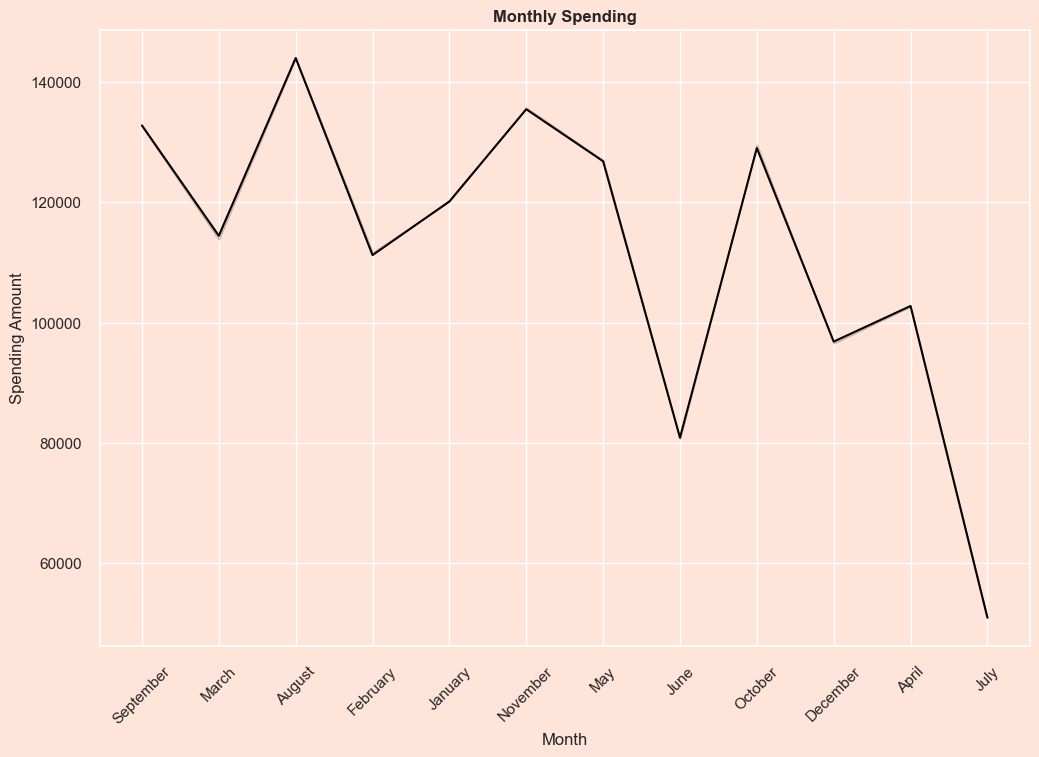

In [77]:
sns.lineplot(data=data, x="customer_month", y="Spending", ci=False, estimator=sum, color="black")
plt.title("Monthly Spending", weight="bold")
plt.xlabel("Month")
plt.ylabel("Spending Amount")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> August shows the highest amount, while July exhibits the lowest. </div>


#### `7. Day Vs. Spending`

In [78]:
data.groupby("day_name")["Spending"].sum().sort_values(ascending=False)

day_name
Monday       217036
Friday       213833
Wednesday    209636
Saturday     197177
Sunday       173054
Thursday     167574
Tuesday      166907
Name: Spending, dtype: int64

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Higher spending on Monday, less spending on Tuesday.</div>

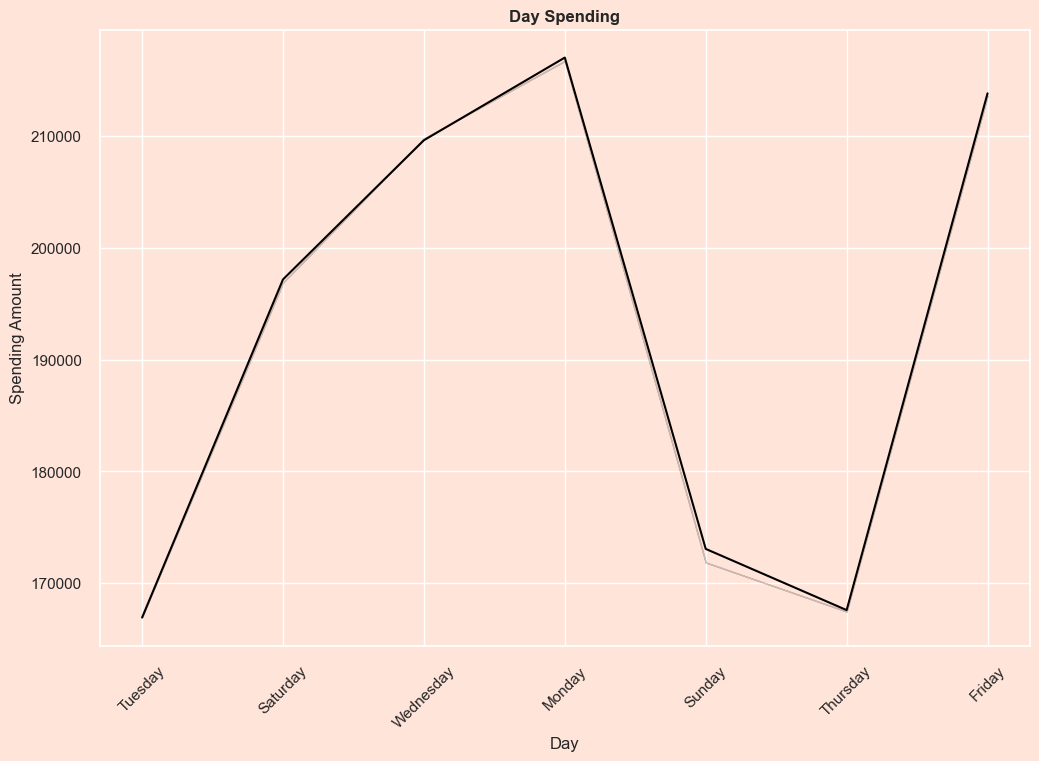

In [79]:
sns.lineplot(data=data, x="day_name", y="Spending", ci=False, estimator=sum, color="black")
plt.title("Day Spending", weight="bold")
plt.xlabel("Day")
plt.ylabel("Spending Amount")
plt.xticks(rotation=45)
plt.show()

#### `8. Income Vs. Spending`

In [80]:
data[["Income", "Spending"]].corr()

,Income,Spending
Income,1.00000,0.79265
Spending,0.79265,1.00000


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> There is a Positive Correlation between Income and Spending.</div>


In [81]:
fig = px.scatter(data_frame=data, x="Income",y="Spending", color="Education",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Income and Spending")
fig.show()

In [82]:
data.columns

Index(['Education', 'Marital_status', 'Income', 'Dt_customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'Numwebvisitsmonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_accepted',
       'customer_month', 'customer_year', 'day_name', 'Age_Group'],
      dtype='object')

#### `8. Deals Vs. (day, month, year)`

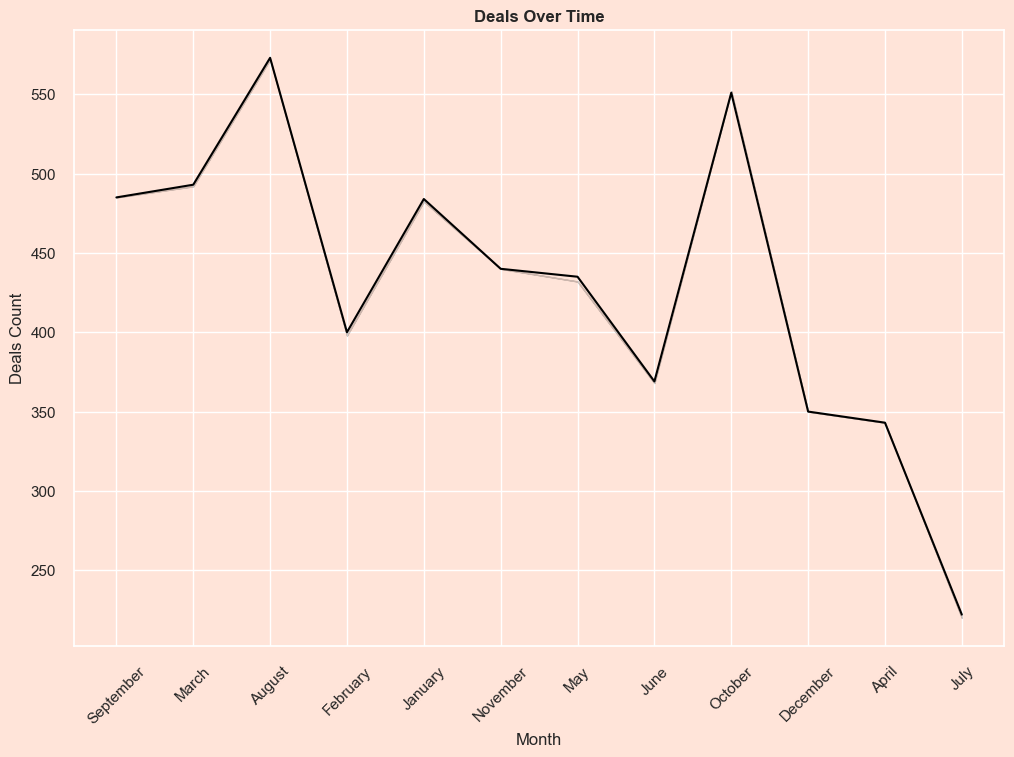

In [83]:
sns.lineplot(data=data, x="customer_month", y="Deals", ci=False, estimator=sum, color="black")
plt.title("Deals Over Time", weight="bold")
plt.xlabel("Month")
plt.ylabel("Deals Count")
plt.xticks(rotation=45)
plt.show()

**The month with the most offers is August and the month with the most spending is August.**
**Let's show the correlation between spending and deals**

In [84]:
data[["Deals", "Spending"]].corr()

,Deals,Spending
Deals,1.000000,-0.065521
Spending,-0.065521,1.000000


In [85]:
fig = px.scatter(data_frame=data, y="Deals", x="Spending",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Deals and Spending")
fig.show()

**There is no correlation between Deals and Spending.**

#### `9. Age Vs. Products`

In [86]:
corr_agg = round(data[products_list+["Age"]].corr(),3).loc["Age",:"Gold"].to_frame()

In [87]:
px.imshow(corr_agg, text_auto=True,
         title="<b>Correlation Between Age and Products",  color_continuous_scale=px.colors.qualitative.Antique)

In [88]:
data.to_csv("output/03_features_engineered.csv", index=False)

----------------